![image](./images/robin-worrall-FPt10LXK0cg-unsplash.jpg)

# EDA: SyriaTel Customer Churn

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#import the data 
df = pd.read_csv('data/customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

*Dealing with class imbalance. Many more no-churn examples than churn.*

In [7]:
#drop phone number bc it's not useful
df = df.drop('phone number',axis=1)

In [8]:
categoricals = ['voice mail plan','international plan','churn']
cat = pd.get_dummies(df[categoricals],drop_first=True)
df = df.drop(categoricals,axis=1)
df = pd.concat([df,cat],axis=1)

In [9]:
df.columns

Index(['state', 'account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'voice mail plan_yes',
       'international plan_yes'],
      dtype='object')

In [10]:
y = df['churn']
X = df.drop('churn',axis=1)

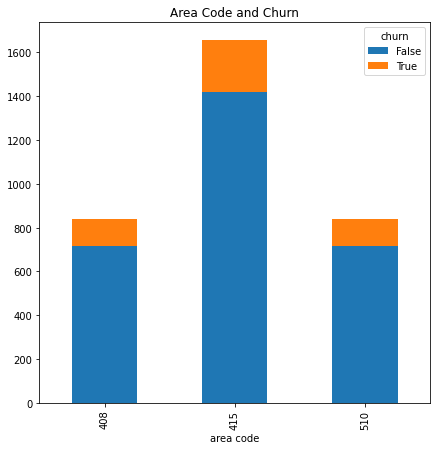

In [11]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7),title = 'Area Code and Churn');


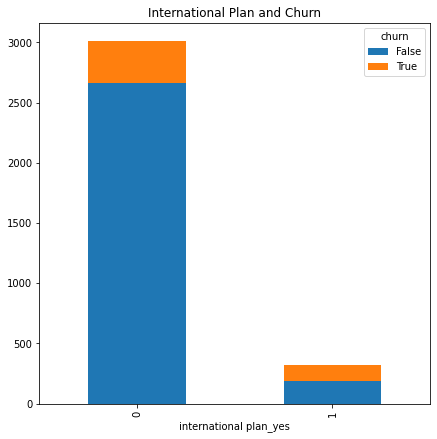

In [12]:
df.groupby(['international plan_yes','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(7,7),title = 'International Plan and Churn');

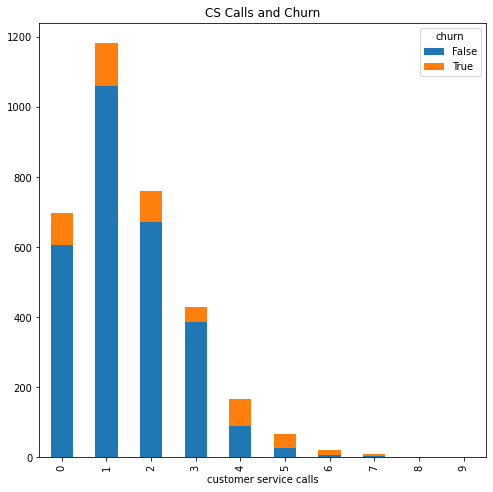

In [13]:
df.groupby(['customer service calls','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,8),title = 'CS Calls and Churn');

In [16]:
fig = px.histogram(df, x="account length", y="account length", color="churn",title = 'Account Length and Churn',
                   hover_data=df.columns)
fig.show()

## Initial Observations